# 阶段二：寻找函数

## 梯度下降法拟合函数

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

In [2]:
# 基准函数依然是 y = 1.2 * x * x - 3.7 * x + 4.9
a_ground_truth = np.double(1.2)
b_ground_truth = np.double(-3.7)
c_ground_truth = np.double(4.9)

target_func = lambda x: a_ground_truth * x * x + b_ground_truth * x + c_ground_truth

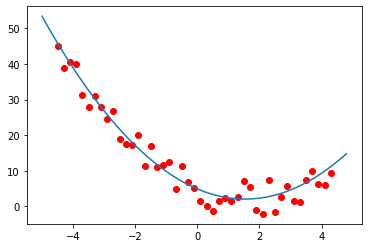

In [3]:
# 生成拟合数据并画出来
points_x = np.arange(-4.5, 4.5, 0.2).astype(np.float64)
points_y = [target_func(x) + 10.0 * (np.double(np.random.rand()) - 0.5) for x in points_x]


pts_x_ground_truth = np.arange(-5.0, 5.0, 0.2).astype(np.float64)
pts_y_ground_truth = [target_func(x) for x in pts_x_ground_truth]

plot(points_x, points_y, 'ro')
plot(pts_x_ground_truth, pts_y_ground_truth)

In [4]:
import sympy as sp

In [5]:
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')

sym_x = sp.Symbol('x')

In [6]:
# 假设寻找的函数符合 y = a * x * x + b * x + c 这个形式
hypo_func = lambda x: a * x * x + b * x + c

In [7]:
# 设定如何衡量拟合函数的结果和真实值的差距
distance_func = lambda x,y: (y - hypo_func(x))**2

In [8]:
# 当仅仅第一个拟合数据点被放入拟合函数时得到的损失：loss_0
loss = sp.Poly(distance_func(points_x[0], points_y[0]))
loss

Poly(410.0625*a**2 - 182.25*a*b + 40.5*a*c - 1821.02891914692*a + 20.25*b**2 - 9.0*b*c + 404.673093143761*b + 1.0*c**2 - 89.9273540319468*c + 2021.73225079678, a, b, c, domain='RR')

In [9]:
# 找出，从第一个拟合数据点看到的，损失（loss）随着 a，b，c 变化的方式：dloss/da. dloss/db, dloss/dc
gradients = [loss.diff(var) for var in [a,b,c]]
gradients

In [10]:
# 随意生成一组 a,b,c
x_current = np.random.rand(3).astype(np.double)
x_dict = {var:val for var,val in zip([a,b,c],x_current)}
x_current

array([0.35387374, 0.52255134, 0.59896882])

In [11]:
# 把上面损失随着 a，b，c 的变化中的 a, b, c 值用刚刚生成的随机值代入
# 这里为什么可以代入，涉及到变分等复杂的数学问题，就不讲了
gradient_val = np.array([np.double(expr.eval(x_dict)) for expr in gradients])
gradient_val

array([-1601.78496184,   355.95221374,   -79.10049194])

In [12]:
# 每次更新，把变化以多大的比例添加到 a，b，c 中
learning_rate = 0.0001

In [13]:
# 做一次梯度更新的样子
x_next = x_current - learning_rate * gradient_val
x_next

array([0.51405224, 0.48695612, 0.60687887])

In [15]:
# 一共做 50 * 30 次全数据更新
iter_max = 50*30

x_current = np.random.rand(3).astype(np.double)

for i in range(iter_max):
    if i%50 == 0:
        print(x_current)
    for ptx, pty in zip(points_x, points_y):
        # 对于每个点都更新一下
        x_current = x_next
        x_dict = {var:val for var, val in zip([a,b,c], x_current)}
        
        loss = sp.Poly(distance_func(ptx, pty))
        gradient_val = np.array(
            [np.double( loss.diff(var).eval(x_dict) ) for var in [a,b,c]]
        )
        x_next = x_current - learning_rate * gradient_val

[0.40023695 0.54132846 0.21619008]
[ 1.10750004 -3.80025214  4.85859898]
[ 1.1074422  -3.80023955  4.85927862]
[ 1.10739485 -3.80023679  4.8598353 ]
[ 1.10735606 -3.80023488  4.86029139]
[ 1.10732427 -3.80023334  4.86066509]
[ 1.10729823 -3.80023208  4.86097128]
[ 1.10727689 -3.80023104  4.86122215]
[ 1.1072594  -3.80023019  4.8614277 ]
[ 1.10724508 -3.8002295   4.86159611]
[ 1.10723334 -3.80022893  4.8617341 ]
[ 1.10722372 -3.80022846  4.86184716]
[ 1.10721584 -3.80022808  4.8619398 ]
[ 1.10720939 -3.80022777  4.8620157 ]
[ 1.1072041  -3.80022751  4.86207789]
[ 1.10719976 -3.8002273   4.86212884]
[ 1.10719621 -3.80022713  4.86217059]
[ 1.1071933  -3.80022698  4.86220479]
[ 1.10719092 -3.80022687  4.86223282]
[ 1.10718897 -3.80022677  4.86225578]
[ 1.10718737 -3.8002267   4.8622746 ]
[ 1.10718606 -3.80022663  4.86229001]
[ 1.10718498 -3.80022658  4.86230264]
[ 1.1071841  -3.80022654  4.86231299]
[ 1.10718338 -3.8002265   4.86232147]
[ 1.10718279 -3.80022647  4.86232842]
[ 1.1071823  -3

In [16]:
# 检查一下结果
print('Checking the ground truth of [a,b,c]')
np.array([1.2, -3.7, 4.9]).astype(np.float64)

Checking the ground truth of [a,b,c]


array([ 1.2, -3.7,  4.9])